Read a dataset containing sales data from a CSV file. Perform data cleaning and show summary statistics.
statistics (mean, median, etc.) visualized using a bar A line chart showing temperature variations across

steps:
.  Read the dataset using pandas.
·  Clean the data by handling missing values, duplicates, or incorrect data types.
·  Generate summary statistics such as mean, median, etc., and display them.
·  Visualize the summary statistics using a bar chart.
·  Create a line chart to visualize temperature variations (if applicable).

Missing values in each column:
Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64
Missing values after filling:
Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64
Number of duplicates: 24
Data types before conversion:
Formatted Date               object
Summary                      object
Precip Type                  object
Temper

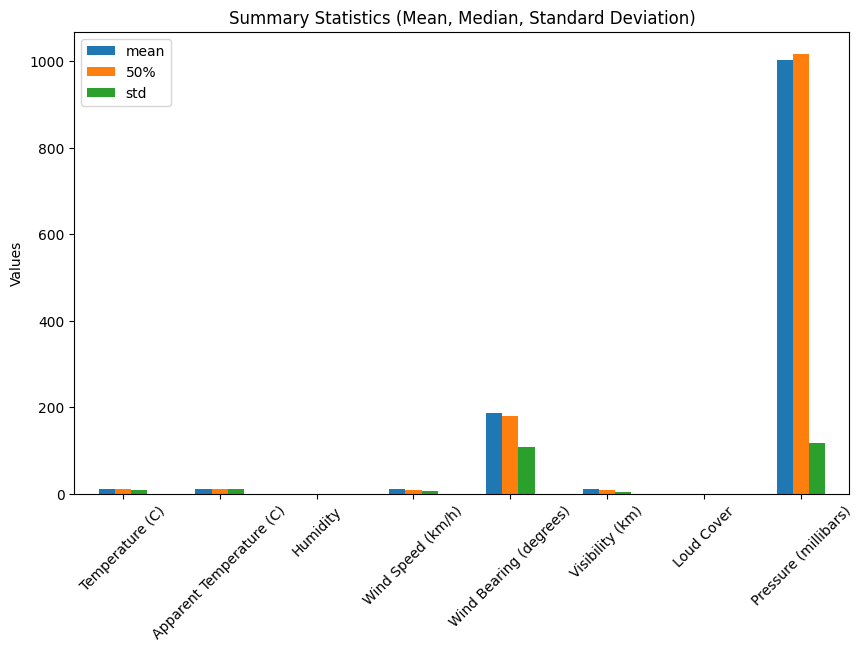

Temperature data or date column not found in the dataset.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the dataset from a CSV file
file_path = 'weatherHistory.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Step 2: Data cleaning
# Check for missing values
missing_values = df.isnull().sum()
print(f"Missing values in each column:\n{missing_values}")

# Fill missing values for numeric columns with median and for categorical columns with mode (most frequent value)
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    df[column] = df[column].fillna(df[column].median())  # Assign the result back to the column

for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].fillna(df[column].mode()[0])  # Assign the result back to the column

# Check for missing values after filling
missing_values_after_fill = df.isnull().sum()
print(f"Missing values after filling:\n{missing_values_after_fill}")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicates: {duplicates}")

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check for data types and convert if necessary
print(f"Data types before conversion:\n{df.dtypes}")
# Example: Convert a column to a numeric type if needed
# df['sales'] = pd.to_numeric(df['sales'], errors='coerce')

# Step 3: Summary Statistics
summary_stats = df.describe()  # Get summary statistics for numerical columns
print("Summary Statistics:\n", summary_stats)

# Step 4: Visualize summary statistics (mean, median, etc.) using a bar chart
summary_stats.loc[['mean', '50%', 'std']].T.plot(kind='bar', figsize=(10, 6))
plt.title("Summary Statistics (Mean, Median, Standard Deviation)")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.show()

# Step 5: Create a line chart for temperature variations (if applicable)
# Assuming there's a 'temperature' column and 'date' or 'time' column
if 'temperature' in df.columns and 'date' in df.columns:
    df['date'] = pd.to_datetime(df['date'])  # Ensure the date is in datetime format
    plt.figure(figsize=(10, 6))
    plt.plot(df['date'], df['temperature'], marker='o', linestyle='-', color='blue')
    plt.title("Temperature Variations Over Time")
    plt.xlabel("Date")
    plt.ylabel("Temperature")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()
else:
    print("Temperature data or date column not found in the dataset.")
